# Project description

You work at a startup that sells food products. You need to investigate user behavior for the company's app.
First study the sales funnel. Find out how users reach the purchase stage. How many users actually make it to this stage? How many get stuck at previous stages? Which stages in particular?
Then look at the results of an A/A/B test. (Read on for more information about A/A/B testing.) The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.

## Tables Of Contents <a class="anchor" id="table_of_contents"></a>

### [Step 1. Downloading the data and preparing it for analysis](#chapter1)
1. Data investigation
    * Concluisons
2. Data preparation
    * Concluisons
    
### [Step 2. Studying and checking the data](#chapter2)
1. How many events are in the logs?
2. How many users are in the logs?
3. What's the average number of events per user?
4. What period of time does the data cover? Find the maximum and the minimum date. 
    - Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. 
    - Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?
5. Did you lose many events and users when excluding the older data?
6. Make sure you have users from all three experimental groups.

### [Step 3. Study the event funnel](#chapter3)
1. See what events are in the logs and their frequency of occurrence. Sort them by frequency.
2. Find the number of users who performed each of these actions. 
    - Sort the events by the number of users. 
    - Calculate the proportion of users who performed the action at least once.
3. In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
4. Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
5. At what stage do you lose the most users?
6. What share of users make the entire journey from their first event to payment?

### [Step 4. Study the results of the experiment](#chapter4)
1. How many users are there in each group?
2. We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
3. Select the most popular event. In each of the control groups, find the number of users who performed this action. 
    - Find their share. 
    - Check whether the difference between the groups is statistically significant. 
    - Repeat the procedure for all other events (it will save time if you create a special function for this test). 
    - Can you confirm that the groups were split properly?
4. Do the same thing for the group with altered fonts. 
    - Compare the results with those of each of the control groups for each event in isolation. 
    - Compare the results with the combined results for the control groups. 
    - What conclusions can you draw from the experiment?
5. What significance level have you set to test the statistical hypotheses mentioned above? 
    - Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. 
    - What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

## Step 1. Downloading the data and preparing it for analysis <a class="anchor" id="chapter1"></a>
- Downloading the data. 
- Optimizing the data for analysis and renaming the columns if needed. 
- Making sure each column contains the correct data type.
- Making sure there are no missing values.
- Making sure there are no duplicates.
- Adding a date and time column and a separate column for dates.

### 1. Data investigation <a class="anchor" id="chapter1"></a>

In [1]:
#let's import pandas and other necessary libraries and the source dataset:
import pandas as pd
from matplotlib import ticker
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly import graph_objects as go
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest
from datetime import datetime, timedelta
%matplotlib inline
from scipy import stats

dataset = r"/datasets/logs_exp_us.csv"
data = pd.read_csv(dataset, sep="\t")

In [2]:
#investigating the 'data' dataset:
print(data.info())
print(data.head())
print(data.tail())
print(data.sample())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
                 EventName         DeviceIDHash  EventTimestamp  ExpId
244121    MainScreenAppear  4599628364049201812      1565212345    247
244122    MainScreenAppear  5849806612437486590      1565212439    246
244123    MainScreenAppear  5746969

In [3]:
#let's check if the dataset contains the duplicates:
data.duplicated().sum()

413

In [4]:
#checking the missing values by columns:
data.isnull().sum()

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64

In [5]:
#checking 0 values:
for i in data.columns:
    print(i, len(data[data[i] == 0]))

EventName 0
DeviceIDHash 0
EventTimestamp 0
ExpId 0


In [6]:
data.describe(include=['object'])

,EventName
count,244126
unique,5
top,MainScreenAppear
freq,119205


In [7]:
#let's take a look at value counts:
print(data['EventName'].value_counts().head(10))
print(data['DeviceIDHash'].value_counts().head())
print(data['EventTimestamp'].value_counts().head())
print(data['ExpId'].value_counts().head())

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: EventName, dtype: int64
6304868067479728361    2308
197027893265565660     2003
4623191541214045580    1771
6932517045703054087    1448
1754140665440434215    1222
Name: DeviceIDHash, dtype: int64
1564935799    9
1564670435    9
1565017227    8
1565191469    8
1564911846    8
Name: EventTimestamp, dtype: int64
248    85747
246    80304
247    78075
Name: ExpId, dtype: int64


In [8]:
#checking for duplicates
data[data.duplicated(keep=False)]

,EventName,DeviceIDHash,EventTimestamp,ExpId
452,MainScreenAppear,5613408041324010552,1564474784,248
453,MainScreenAppear,5613408041324010552,1564474784,248
2348,CartScreenAppear,1694940645335807244,1564609899,248
2350,CartScreenAppear,1694940645335807244,1564609899,248
3572,MainScreenAppear,434103746454591587,1564628377,248
...,...,...,...,...
242359,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242360,PaymentScreenSuccessful,2382591782303281935,1565206049,246
242362,CartScreenAppear,2382591782303281935,1565206049,246
242634,MainScreenAppear,4097782667445790512,1565206618,246


### Conclusions <a class="anchor" id="chapter2"></a>
Investigating the 'data' dataset:
- The dataset consists of 244126 rows and 4 columns. Data types: int64(3), object(1). 
- Column names are self-descriptive and I'll change them to lowercase and add lower space ('_') if the column name consists of several words for better understanding.
- Duplicates found (768 rows).
- No missing values found.
- Unique values and value counts checked.

### Preparing the dataset <a class="anchor" id="chapter2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [9]:
#checking the memory usage before data preparation
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
EventName         244126 non-null object
DeviceIDHash      244126 non-null int64
EventTimestamp    244126 non-null int64
ExpId             244126 non-null int64
dtypes: int64(3), object(1)
memory usage: 22.9 MB


In [10]:
#making the column names lowercase for convenience
data.columns = map(str.lower, data.columns)

In [11]:
#changing the column names for convenience
data.columns = ['event_name', 'user_id', 'timestamp', 'experiment_id']

In [12]:
#let's calculate what amount of data is corrupted by duplicates
len(data[data.duplicated(keep=False)]) - len(data[data.duplicated(
    keep='first')]), (len(data[data.duplicated(keep=False)]) -
                      len(data[data.duplicated(keep='first')])) / len(data) * 100

(355, 0.1454167110426583)

As amount of duplicates is around 0.15% of rows, I've decided to get rid of them.

In [13]:
#deleting the duplicates and resetting the index
data = data[~data.duplicated()].reset_index(drop=True)

In [14]:
#adding date and time columns and a separate column for dates
data['timestamp'] = data['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

data['day'] = data['timestamp'].dt.date
data['hour'] = data['timestamp'].dt.hour
data['day_hour'] = pd.to_datetime(data['day']) + pd.to_timedelta(data.hour,
                                                                 unit='h')

In [15]:
#changing 'event_name' column type to category
data['event_name'].astype('category')

0                MainScreenAppear
1                MainScreenAppear
2         PaymentScreenSuccessful
3                CartScreenAppear
4         PaymentScreenSuccessful
                   ...           
243708           MainScreenAppear
243709           MainScreenAppear
243710           MainScreenAppear
243711           MainScreenAppear
243712         OffersScreenAppear
Name: event_name, Length: 243713, dtype: category
Categories (5, object): [CartScreenAppear, MainScreenAppear, OffersScreenAppear, PaymentScreenSuccessful, Tutorial]

In [16]:
#pivoting a table for first event times per user
event_times_per_user = data.pivot_table(index='user_id',
                                    columns='event_name',
                                    values='timestamp',
                                    aggfunc='min')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 7 columns):
event_name       243713 non-null object
user_id          243713 non-null int64
timestamp        243713 non-null datetime64[ns]
experiment_id    243713 non-null int64
day              243713 non-null object
hour             243713 non-null int64
day_hour         243713 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 13.0+ MB


### Conclusions <a class="anchor" id="chapter2"></a>
Preparing the 'data' dataset:
- The dataset consists of 244126 rows and 4 columns. Data types: datetime64[ns](1), int64(2), object(1). 
- Column names changed to lowercase and added lower space ('_') if the column name consists of several words for better understanding.
- Duplicates found and deleted.
- No missing values found.
- New columns added: date and time columns and a separate table for event times.

### Step 2. Studying and checking the data<a class="anchor" id="chapter2"></a>

[Go back to the Table of Contents](#table_of_contents)

#### 1. How many events are in the logs?

In [18]:
print(data['event_name'].value_counts())

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event_name, dtype: int64


In total we have 5 event types. Let's visualize their distribution by plotting a hist.

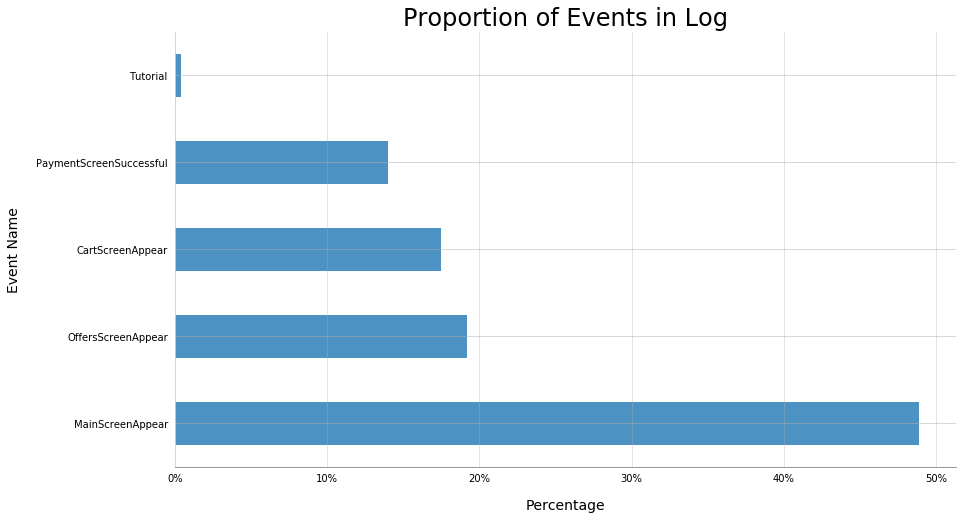

In [19]:
#plotting a graph
fig, ax = plt.subplots(figsize=(14, 8))
data['event_name'].value_counts(normalize=True).plot(kind='barh',
                                                   rot=0,
                                                   alpha=.8)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))
plt.grid(axis='x', alpha=.7)
sns.despine()
ax.grid(linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('lightgrey')
ax.tick_params(axis='both', left=False, bottom=False)
    
#providing labels and title
plt.ylabel('Event Name', labelpad=15, fontsize=14)
plt.xlabel('Percentage', labelpad=15, fontsize=14)
plt.title('Proportion of Events in Log', fontsize=24)
plt.show()

As we see from the plot almost 50% (or 119101) of events falls on MainScreenAppear, almost 20% (46808 of events) on OffersScreenAppear, around 17% (42668 events) of events belong to CartScreenAppear, around 13% (or 34118) to PaymentScreenSuccessful and 1% (1018 events) to Tutorial, which gives us a rough picture of events funnel. The event distribution is logical and order is as expected.

#### 2. How many users are in the logs?

[Go back to the Table of Contents](#table_of_contents)

In [20]:
print('Unique Users:', data['user_id'].nunique())

Unique Users: 7551


In total we observe 7551 unique users in logs.

#### 3. What's the average number of events per user?

[Go back to the Table of Contents](#table_of_contents)

In [21]:
#first let's group data and count total number of events per user
events_per_user = data.groupby('user_id').agg({'event_name':
                                             'count'})['event_name']

In [22]:
#now let's get average number of events per user (I've decided to use median value as more accurate than mean)
events_median = events_per_user.mean()
print(round(events_median, 2))

32.28


Average number of events per user is 20.

#### 4.1 What period of time does the data cover? Find the maximum and the minimum date. 

[Go back to the Table of Contents](#table_of_contents)

In [23]:
#let's substract minimum datetime from maximum and get the period of time covered
data['timestamp'].max() - data['timestamp'].min()

Timedelta('13 days 16:31:41')

The data covers a period of 14 days.

In [24]:
#defining the time and date of the first event in the dataset
data['timestamp'].min()

Timestamp('2019-07-25 04:43:36')

In [25]:
#defining the time and date of the last event in the dataset
data['timestamp'].max()

Timestamp('2019-08-07 21:15:17')

The data has been collected starting from '2019-07-25 04:43:36' and finishing on '2019-08-07 21:15:17'.
In two words it's from July, 25th to August, 7th, year 2019.

#### 4.2 Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. 

[Go back to the Table of Contents](#table_of_contents)

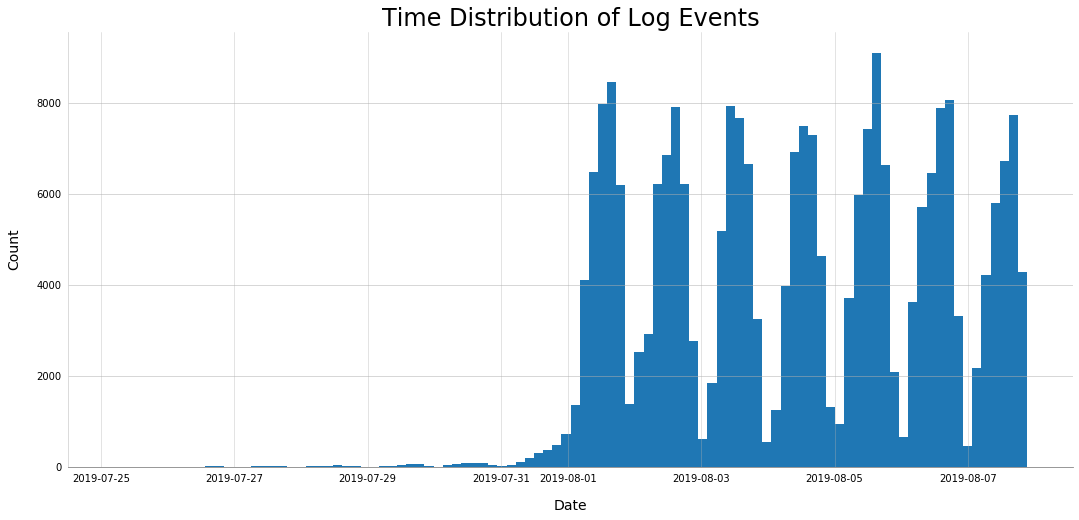

In [26]:
#plotting a histogram by date and time to inspect event time distribution
ax = data['timestamp'].hist(figsize=(18, 8), bins=100)

plt.grid(axis='x', alpha=.7)
sns.despine()
ax.grid(linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('lightgrey')
ax.tick_params(axis='both', left=False, bottom=False)
    
#providing labels and title
plt.ylabel('Count', labelpad=15, fontsize=14)
plt.xlabel('Date', labelpad=15, fontsize=14)
plt.title('Time Distribution of Log Events', fontsize=24)
plt.show()

Now we see that the data is being normally distributed starting from the 31st of July. Even though we have the records starting from 25th of July this period up to the 31st of July doesn't show us enough data to make tests or conclusions. So we should specify the data range (31, July - 7, August) for further investigations. As we see it's 7 days, meaning 1 week of investigations.

#### 4.3 Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?

[Go back to the Table of Contents](#table_of_contents)

In [27]:
#let's define the specific starting point for further investigation
start = str(data['timestamp'].max() - timedelta(days=7))
start

'2019-07-31 21:15:17'

In [28]:
#defining the new dataset by timeframe
new = data[(data['timestamp'] > start)]
new_data = new.reset_index(drop=True).copy()
new_data.head()

,event_name,user_id,timestamp,experiment_id,day,hour,day_hour
0,MainScreenAppear,384642128335787102,2019-07-31 21:15:35,246,2019-07-31,21,2019-07-31 21:00:00
1,MainScreenAppear,5924591427413218387,2019-07-31 21:15:42,247,2019-07-31,21,2019-07-31 21:00:00
2,PaymentScreenSuccessful,3001657979204168225,2019-07-31 21:15:57,248,2019-07-31,21,2019-07-31 21:00:00
3,CartScreenAppear,3001657979204168225,2019-07-31 21:15:57,248,2019-07-31,21,2019-07-31 21:00:00
4,MainScreenAppear,3773293147331066460,2019-07-31 21:16:01,248,2019-07-31,21,2019-07-31 21:00:00


#### 5. Did you lose many events and users when excluding the older data?

In [29]:
#let's calculate percentage of rows dropped and their amount
print((len(data) - len(new))/ len(data) * 100, len(data[(data['timestamp'] < start)]))

0.8436152359537654 2056


Around 0.84% of data were dropped, or 2056 rows. It's a very small amount of data, so we can keep working on our new dataset.

#### 6. Make sure you have users from all three experimental groups.

[Go back to the Table of Contents](#table_of_contents)

In [30]:
#defining unique users
unique_users = new_data.groupby(['user_id'])

#definig unique users and their unique experiments
users_group = unique_users.apply(lambda x: x['experiment_id'].unique())

#checking if user is in more than one experimental group
users_group[users_group.apply(lambda x: len(x)) > 1]

Series([], dtype: object)

In [31]:
#grouping the unique users by proportion in experiments
proportion_experiment = new_data.groupby(['experiment_id']).agg({
    'user_id':
    'nunique'
}).divide(
    new_data['user_id'].nunique())

In [32]:
proportion_experiment

,user_id
experiment_id,
246,0.329530
247,0.333908
248,0.336561


As we see from proportion the users are equally distributed in all three experiments.

### Conclusions
Almost 50% (or 119101) of events falls on MainScreenAppear, almost 20% (46808 of events) on OffersScreenAppear, around 17% (42668 events) of events belong to CartScreenAppear, around 13% (or 34118) to PaymentScreenSuccessful and 1% (1018 events) to Tutorial, which gives us a rough picture of events funnel. The event distribution is logical and order is as expected.

In total we have 7551 unique users in logs.
Median number of events per user is 20.

The data has been collected starting from '2019-07-25 04:43:36' and finishing on '2019-08-07 21:15:17'. In two words it's from July, 25th to August, 7th, year 2019.

Now we see that the data is being normally distributed starting from the 31st of July. Even though we have the records starting from 25th of July this period up to the 31st of July doesn't show us enough data to make tests or conclusions. So we should specify the data range (31, July - 7, August) for further investigations. As we see it's 7 days, meaning 1 week of investigations.

The users are equally distributed in all three experiments (33% in each group).

### Step 3. Study the event funnel<a class="anchor" id="chapter3"></a>

#### 1. See what events are in the logs and their frequency of occurrence. Sort them by frequency.

[Go back to the Table of Contents](#table_of_contents)

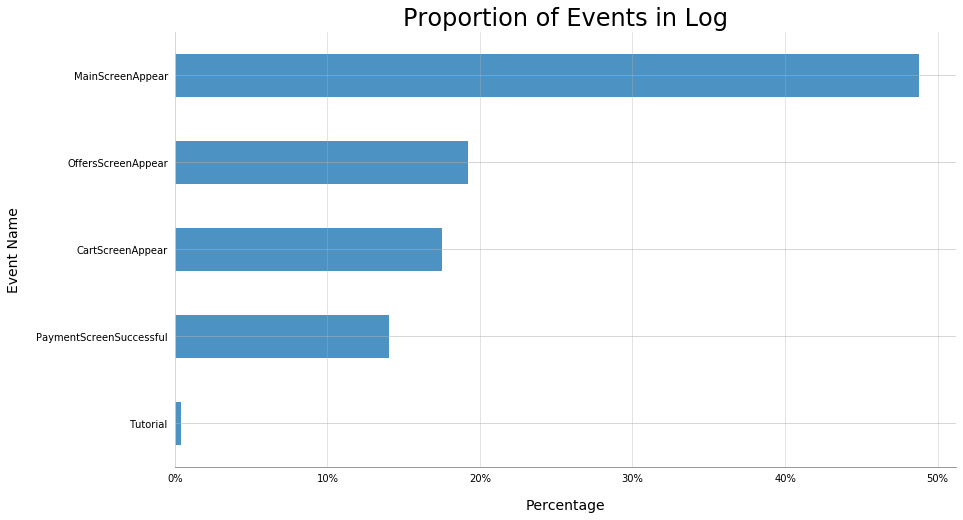

In [33]:
#we've already made a similar hist before, but now let's sort the values
#for our new dataset by frequency of occurence
fig, ax = plt.subplots(figsize=(14, 8))
new_data['event_name'].value_counts(normalize=True).sort_values().plot(kind='barh',
                                                   rot=0,
                                                   alpha=.8)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(1, decimals=0))
plt.grid(axis='x', alpha=.7)
sns.despine()
ax.grid(linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('lightgrey')
ax.tick_params(axis='both', left=False, bottom=False)
    
#providing labels and title
plt.ylabel('Event Name', labelpad=15, fontsize=14)
plt.xlabel('Percentage', labelpad=15, fontsize=14)
plt.title('Proportion of Events in Log', fontsize=24)
plt.show()

The proportion of events in the new dataset (31.07-07.08) is equal to the one we've seen before dropping the data. As we see from the plot around 48% of events fall on MainScreenAppear, almost 19% on OffersScreenAppear, around 17% of events belong to CartScreenAppear, around 13% to PaymentScreenSuccessful and 1% (1018 events) to Tutorial, which gives us a rough picture of events funnel. The event distribution is logical and order is as expected.

#### 2. Find the number of users who performed each of these actions. 
- Sort the events by the number of users. 
- Calculate the proportion of users who performed the action at least once.

[Go back to the Table of Contents](#table_of_contents)

In [34]:
#finding the number of unique users who performed each action and sorting them by the number of users
new_data.groupby(['event_name']).agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False)

,user_id
event_name,
MainScreenAppear,7423
OffersScreenAppear,4596
CartScreenAppear,3736
PaymentScreenSuccessful,3540
Tutorial,843


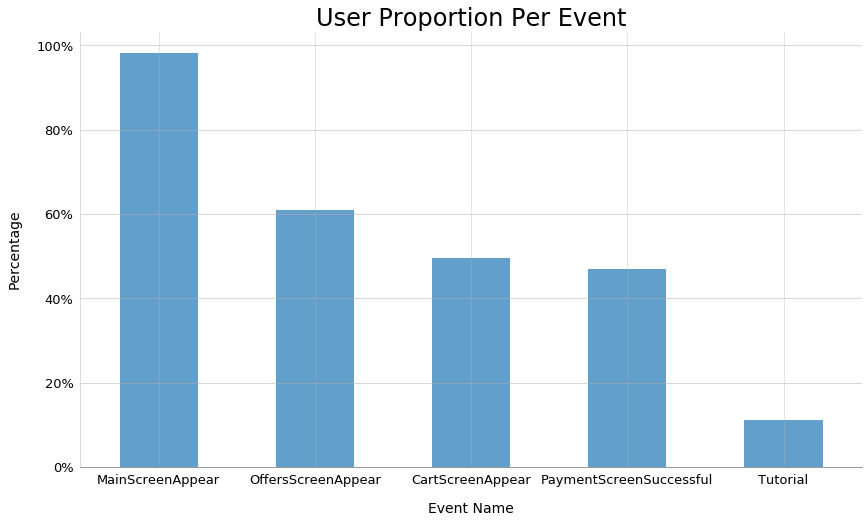

In [35]:
#plotting a hist to reflect the proportion of users who performed the action at least once
ax = new_data.groupby(['event_name']).agg({'user_id': 'nunique'}).sort_values('user_id', ascending=False).div(
    data['user_id'].nunique()).plot.bar(rot=0, figsize=(14, 8), legend=False, alpha=.7, fontsize=13)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))

plt.grid(axis='x', alpha=.7)
sns.despine()
ax.grid(linewidth=.5, zorder=2)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('lightgrey')
ax.tick_params(axis='both', left=False, bottom=False)
    
    # labels
plt.ylabel('Percentage', labelpad=15, fontsize=14)
plt.xlabel('Event Name', labelpad=15, fontsize=14)
plt.title('User Proportion Per Event', fontsize=24)

plt.show()

Around 98% of unique users started performing the action (participated in MainScreenAppear event), 60% have seen the OfferScreen, around 43% of them have reached PaymentScreenSuccessful event, but only around 10% of them have reached the Tutorial event.

#### 3. In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.

[Go back to the Table of Contents](#table_of_contents)

An obvious order of actions seems to be the following: 
1. Main screen appears,
2. Offers screen appears,
3. Cart screen appears,
4. Successful payment screen appears,
5. Tutorial.

They seem to be a logical sequence. When it comes to sales funnel the final stage has to be PaymentScreenSuccessful event (without Tutorial), but we should also investigate why so few users have reached the Tutorial event.

#### 4. Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)

[Go back to the Table of Contents](#table_of_contents)

In [36]:
#total unique users per event (value count for each user)
funnel = new_data.groupby('event_name').agg({"user_id":'nunique'}).sort_values('user_id',ascending=False).reset_index()
funnel.columns = ['event_name', 'total_count']
funnel_no_tutorial = funnel.drop(funnel.index[4])
#share of users at current stage relative to previous stage
funnel_no_tutorial['user_conversion'] = funnel_no_tutorial['total_count'].div(
    funnel_no_tutorial['total_count'].shift(1)).fillna(1) * 100
funnel_no_tutorial['user_conversion'] = funnel_no_tutorial['user_conversion'].round(2)
fig = go.Figure()

fig.add_trace(go.Funnel(
                x=funnel_no_tutorial['user_conversion'],
                y=funnel_no_tutorial['event_name'],
                opacity=.7
))
fig.update_layout(title={
    'text': 'Event Ratio per Stage'
},
                  xaxis_title="",
                  yaxis_title="",
                  )

#### 5. At what stage do you lose the most users?

As we see from the funnel chart, we lose the most (39% of users) on the second stage - OffersScreenAppear event, the next is PaymentScreenSuccessful event where we are losing 36% of users.

#### 6. What share of users make the entire journey from their first event to payment?

[Go back to the Table of Contents](#table_of_contents)

In [37]:
funnel_no_tutorial['total_count'].divide(funnel_no_tutorial['total_count'].max())*100

0    100.000000
1     61.915668
2     50.330055
3     47.689613
Name: total_count, dtype: float64

In [38]:
unique_users = new_data['user_id'].nunique()

In [39]:
unique_users_event = new_data.groupby('event_name').agg({'user_id':'nunique'}).sort_values('user_id',ascending=False).divide(unique_users)*100
unique_users_event_no_tutorial = unique_users_event.drop(unique_users_event.index[4])
fig = go.Figure()
fig.add_trace(go.Funnel(
                y=unique_users_event_no_tutorial.index,
                x=unique_users_event_no_tutorial['user_id'].apply(lambda x: x).round(2),
                opacity=.7
))
fig.update_layout(title={'text':'Unique User Conversion Rates','font':dict(size=24), "x":.5,"y":.87},
                  xaxis_title="",
                  yaxis_title=""
                  )

fig.show()

In [40]:
new_data.query("event_name == 'PaymentScreenSuccessful'")['event_name'].value_counts().divide(len(data))*100

PaymentScreenSuccessful    13.928268
Name: event_name, dtype: float64

In [1]:
visit_conversion = (new_data['event_name'].value_counts(normalize=True)*100).reset_index()
visit_conversion_no_tutorial = visit_conversion.drop(visit_conversion.index[4])
fig = go.Figure()
fig.add_trace(go.Funnel(
                x=visit_conversion_no_tutorial['event_name'],
                y=visit_conversion_no_tutorial['index'].apply(lambda x: x),
                opacity=.7
))
fig.update_layout(title={'text': 'Event Proportion', 'font': dict(family="Courier New, monospace", size=30)},
                  xaxis_title="",
                  yaxis_title="",
                  font=dict(
                      family="Courier New, monospace",
                      size=16
))
fig.show()

NameError: name 'new_data' is not defined

As we see from the funnel chart, we lose the most (39% of users) on the second stage - OffersScreenAppear event, the next is PaymentScreenSuccessful event where we are losing 36% of users.

#### Conclusion
The proportion of events in the new dataset (31.07-07.08) is equal to the one we've seen before dropping the data. As we see from the plot around 48% of events fall on MainScreenAppear, almost 19% on OffersScreenAppear, around 17% of events belong to CartScreenAppear, around 13% to PaymentScreenSuccessful and 1% (1018 events) to Tutorial, which gives us a rough picture of events funnel. The event distribution is logical and order is as expected.

Around 98% of unique users started performing the action (participated in MainScreenAppear event), 60% have seen the OfferScreen, around 43% of them have reached PaymentScreenSuccessful event, but only around 10% of them have reached the Tutorial event.

An obvious order of actions seems to be the following:
- Main screen appears,
- Offers screen appears,
- Cart screen appears,
- Successful payment screen appears.

As we see from the funnel chart, we lose the most (39% of users) on the second stage - OffersScreenAppear event, the next is PaymentScreenSuccessful event where we are losing 36% of users.

Unforutantely we don't have enough data to undersrtand why exactly people are lost on the second and last stages so it's hard to say how the conversion of the service can be increased, but we can presume that customers are annoyed by the offers screen and there might be problems with payment process, or the price is relatively high and they don't want to finish the purchase.

### Step 4. Study the results of the experiment<a class="anchor" id="chapter4"></a>

[Go back to the Table of Contents](#table_of_contents)

#### 1. How many users are there in each group?

In [42]:
experiment_Uniqueuser_Count = new_data.groupby(['experiment_id']).agg({'user_id':'nunique'}).reset_index()

In [43]:
round(experiment_Uniqueuser_Count['user_id']/experiment_Uniqueuser_Count['user_id'].sum()*100,3)


0    32.953
1    33.391
2    33.656
Name: user_id, dtype: float64

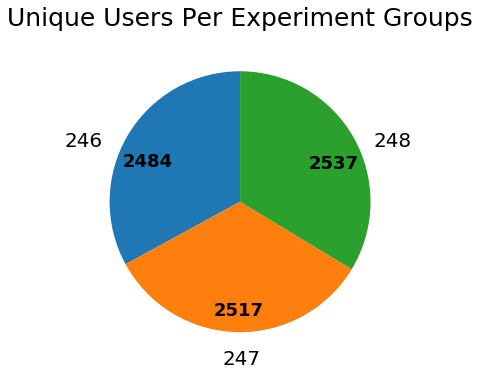

In [44]:
fig, ax = plt.subplots(figsize=(6, 5))

explode = (0.05, 0.05, 0.05)
pie, texts = plt.pie(experiment_Uniqueuser_Count['user_id'].values,
                         labels=experiment_Uniqueuser_Count['user_id'],
                         textprops={
                             'fontsize': 18,
                             'fontweight': 'bold'},
                         labeldistance=.6,
                         startangle=90,
                         radius=1.2)
texts[1].set_horizontalalignment('center')
texts[1].set_y(-1)

plt.text(texts[0].get_position()[0] - 1,
         texts[0].get_position()[1] + .14,
         experiment_Uniqueuser_Count['experiment_id'][0],
         fontsize=20)
plt.text(texts[1].get_position()[0] - .15,
         texts[1].get_position()[1] - .5,
         experiment_Uniqueuser_Count['experiment_id'][1],
         fontsize=20)
plt.text(texts[2].get_position()[0] + .6,
         texts[2].get_position()[1] + .15,
         experiment_Uniqueuser_Count['experiment_id'][2],
         fontsize=20)

plt.title("Unique Users Per Experiment Groups",
          pad=40,
          size=25
          )

plt.show()

#### 2. We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.

[Go back to the Table of Contents](#table_of_contents)

Let's check if there is a statistically significant difference in conversion rates between samples 246 and 247.

In [45]:
new_data.groupby(['experiment_id']).agg({'user_id':'nunique'}).divide(new_data['user_id'].nunique()).iloc[:-1]

,user_id
experiment_id,
246,0.329530
247,0.333908


The number of users in different groups doesn't vary by more than 1%.

#### 3. Select the most popular event. In each of the control groups, find the number of users who performed this action. 
    - Find their share. 
    - Check whether the difference between the groups is statistically significant. 
    - Repeat the procedure for all other events (it will save time if you create a special function for this test). 
    - Can you confirm that the groups were split properly?

[Go back to the Table of Contents](#table_of_contents)

To test the hypotheses, we will be using a two proportion Z-test. Since we are looking for equality (not more or less) in proportion means for all the hypotheses, a two-sided test will be used for all of them.
The assumptions for the test are met:
- sample is greater than 30 
- independent samples
- normally distributed given large sample size.
A false positive rate of 10% will be tolerated for this test.
To test this, we will be using the proportion_ztest methods from the statsmodel library. 

Here are the parameters used:
- nobs = total # of unique users (visitors)
- count = # of unique paying users (customers)
- value = proportion to test against (testing for equality in proportions (conversion rates))
- alternative = alternative hypothesis ('two-sided','smaller','larger').

In [46]:
#creating a function providing z-test proportion
def proportion_ztest(alpha, successes, visits, event_name, test_group_label,
                     first, second, measure = "Conversion Rates"):
    """
    Function that takes in a dataframe, iterates over each of its columns and checks for
    common indicators of missing values (ie. negative values).   

    Args:
         data (pandas.DataFrame): Dataframe to be checked

    Returns:
        list (dict): a list containing (if any) a dictionar[y/ies] of key:value pair in the 
        following format - {column's missing value: % of column's missing value} - sorted in descending order
    """
    
    print(test_group_label, 'Alpha:', alpha)

    stat, pval = proportions_ztest(count=successes,
                                   nobs=visits,
                                   alternative='two-sided')

    if (pval < alpha): 
        print(
            '\t\t\t', event_name, '\n',
            'Rejecting the null hypothesis: there is a significant difference between the proportions.'
        )
    else:
        print(
            '\t\t\t', event_name, '\n',
            "Failed to reject the null hypothesis: there is no reason to consider the proportions different"
        )

    print('P-value:{:.3f}\nZ-value:{:.3f}'.format(pval, stat))
    print('')
    print(first, measure+":", round((successes[0] / visits[0]) * 100,2))
    print(second, measure+":",
          round((successes[1] / visits[1]) * 100, 2))
    
    print( '------------------------------------------------------------------------------')


#### AA test

In [47]:
#querying control group
ControlGroup = new_data.query("experiment_id in [246,247]")

In [48]:
#let's group users in the control group in a separate dataframe
AA_test= pd.merge(ControlGroup.query("event_name in ['PaymentScreenSuccessful']"
             ).groupby('experiment_id').agg({"user_id":"nunique"}),
         (ControlGroup.groupby('experiment_id').agg({"user_id":"nunique"})),left_index =True, right_index=True)

In [49]:
#naming the columns
AA_test.columns = ['unique_customers','unique_visitors']
AA_test

,unique_customers,unique_visitors
experiment_id,,
246,1200,2484
247,1158,2517


#### Hypothesis Tests Per Event
Let's test out each event to asses how the control groups were separated. Since we'll be testing the 4 events per group, it's natural that the false positive rate will increase. To correct this, we'll use the Bonferroni correction: alpha / m (number of comparisons/ hypothesis tests).

In [50]:
alpha = .1
comparisons = 4
bonferroni_alpha = alpha/comparisons

In [51]:
#querying every test group per event
event246 = ControlGroup.query("experiment_id == 246")['event_name'].value_counts()
event247 = ControlGroup.query("experiment_id == 247")['event_name'].value_counts()
event248 = new_data.query("experiment_id == 248")['event_name'].value_counts()

In [52]:
#total number of events
total246 = len(ControlGroup.query("experiment_id == 246"))
total247 = len(ControlGroup.query("experiment_id == 247"))
total248 = len(new_data.query("experiment_id == 248"))

In [53]:
events =['MainScreenAppear','OffersScreenAppear','CartScreenAppear','PaymentScreenSuccessful']

Event proportions: event count (group A) / total events (group A)

For each event:
- HO: Group 246 event proportion equal to group 247 event proportion.
- H1: Group 246 event proportion not equal to group 247 event proportion.

In [54]:
for event in events:
    proportion_ztest(
        bonferroni_alpha,
        [event246[event], event247[event]],
        [total246,total247],
        event,
        'AA_Events ',
        '246',
        '247',"Event Proportion")

AA_Events  Alpha: 0.025
			 MainScreenAppear 
 Rejecting the null hypothesis: there is a significant difference between the proportions.
P-value:0.000
Z-value:-12.875

246 Event Proportion: 47.58
247 Event Proportion: 50.83
------------------------------------------------------------------------------
AA_Events  Alpha: 0.025
			 OffersScreenAppear 
 Rejecting the null hypothesis: there is a significant difference between the proportions.
P-value:0.000
Z-value:-5.431

246 Event Proportion: 18.63
247 Event Proportion: 19.71
------------------------------------------------------------------------------
AA_Events  Alpha: 0.025
			 CartScreenAppear 
 Rejecting the null hypothesis: there is a significant difference between the proportions.
P-value:0.000
Z-value:12.462

246 Event Proportion: 18.48
247 Event Proportion: 16.1
------------------------------------------------------------------------------
AA_Events  Alpha: 0.025
			 PaymentScreenSuccessful 
 Rejecting the null hypothesis: there i

Alpha = 0.05 results:

All the results are statistically significant (null hypotheses rejected).

- control group 246 had the larger shares in CartScreenAppear and PaymentScreenSuccessful events.
- control group 247 had the larger relative share in the MainScreenAppear and OffersScreenAppear events. 

Unique users who make a lot of purchases seem to have been placed in 246 at a larger share than in 247.
So we can say that when it comes to actually making a payment 246 group is more succesful, and 247 group is better in advertising (p <.001).

Alpha = 0.1 results:

All the results are statistically significant (null hypotheses rejected).
Results are the same as for alpha 0.05.

#### 4. Do the same thing for the group with altered fonts. 
    - Compare the results with those of each of the control groups for each event in isolation. 
    - Compare the results with the combined results for the control groups. 
    - What conclusions can you draw from the experiment?

[Go back to the Table of Contents](#table_of_contents)

Testing the third grouped compared to the others.
Event proportions: event count (group Z) / total events (group Z).

For each event:
- HO: group 248 event proportion equal to group 246 event proportion.
- H1: group 248 event proportion not equal to group 246 event proportion.
- HO: group 248 event proportion equal to group 247 event proportion.
- H1: group 248 event proportion not equal to group 247 event proportion.

In [55]:
alpha = .1
event, groups = 4,2
comparisons = event * groups 
bonferroni_alpha = alpha/(event* comparisons)

In [56]:
for event in events:
    for AA_group, totalAA,label in zip([event246, event247], [total246, total247],['246','247']):
        proportion_ztest(bonferroni_alpha,
                         [event248[event], AA_group[event]], [total248,totalAA],
                          event, 'AB - Events', 'B: 248',
                         'A:'+label,"Event Proportion")

AB - Events Alpha: 0.003125
			 MainScreenAppear 
 Failed to reject the null hypothesis: there is no reason to consider the proportions different
P-value:0.088
Z-value:1.704

B: 248 Event Proportion: 48.0
A:246 Event Proportion: 47.58
------------------------------------------------------------------------------
AB - Events Alpha: 0.003125
			 MainScreenAppear 
 Rejecting the null hypothesis: there is a significant difference between the proportions.
P-value:0.000
Z-value:-11.388

B: 248 Event Proportion: 48.0
A:247 Event Proportion: 50.83
------------------------------------------------------------------------------
AB - Events Alpha: 0.003125
			 OffersScreenAppear 
 Rejecting the null hypothesis: there is a significant difference between the proportions.
P-value:0.000
Z-value:3.953

B: 248 Event Proportion: 19.4
A:246 Event Proportion: 18.63
------------------------------------------------------------------------------
AB - Events Alpha: 0.003125
			 OffersScreenAppear 
 Failed to r

Alpha = 0.05 results:

Event proportions from control group 247 have a higher MainScreenAppear proportion rate than the experimental group, but less in the CartScreenAppear and PaymentScreenSuccessful (p <.001).

An opposite result appears between control group 246 and the experimental group. Visitors to the site from experimental group 248 have a higher MainScreenAppear, OffersScreenAppear proportion rate than control group 246 (p<.001), but less in the CartScreenAppear and PaymentScreenSuccessful (p <.001).

Alpha = 0.1 results:
Results are the same as for alpha 0.05.

Testing the third grouped compared to the others.
Conversion rate: unique customers / unique visitors
Per AA group:
HO: group 248 user conversion rates equal to AA group user conversion rate.
H1: group 248 user conversion rates not equal to AA group user conversion rate.

Checking if font size for experimental group 248 converts more unique users.

In [57]:
alpha = .05

bonferroni_alpha = alpha / 2

In [58]:
B_test = pd.merge(new_data.query("experiment_id == 248 and event_name in ['PaymentScreenSuccessful']"
             ).groupby('experiment_id').agg({"user_id":"nunique"}),
        new_data.query("experiment_id == 248"
             ).groupby('experiment_id').agg({"user_id":"nunique"}),left_index=True, right_index=True)

In [59]:
B_test.columns = ['unique_customers','unique_visitors']

In [60]:
AA_test.iloc[0]

unique_customers    1200
unique_visitors     2484
Name: 246, dtype: int64

In [61]:
int(B_test['unique_customers'])

1182

In [62]:
for AA_group in range(2):
    A = AA_test.iloc[AA_group]
    proportion_ztest(bonferroni_alpha,
                    [int(B_test['unique_customers']), A.loc['unique_customers']],
                    [int(B_test['unique_visitors']), A.loc['unique_visitors']],   
                     '', 'AB','248',AA_test.index[AA_group])

AB Alpha: 0.025
			  
 Failed to reject the null hypothesis: there is no reason to consider the proportions different
P-value:0.223
Z-value:-1.219

248 Conversion Rates: 46.59
246 Conversion Rates: 48.31
------------------------------------------------------------------------------
AB Alpha: 0.025
			  
 Failed to reject the null hypothesis: there is no reason to consider the proportions different
P-value:0.678
Z-value:0.416

248 Conversion Rates: 46.59
247 Conversion Rates: 46.01
------------------------------------------------------------------------------


Alpha = 0.05 results:
The statistically significant level hasn't been reached (p >.001). The proportions are equal. 

Alpha = 0.1 results:
Results are the same as for alpha 0.05.

The results don't show any improvement in user conversion rates between the control groups and the experimental group all relevant t-tests: p > .05. We should stop the experiment.

#### 5. What significance level have you set to test the statistical hypotheses mentioned above? 
    - Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. 
    - What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

First I took a statistical significance level of 0.05, and then repeated the tests with statistical significance level of 0.1. I didn't observe any changes in test results. Overall I tried the statistical significance 0.1 only because it was the task given, otherwise I would have chosen .05 significance level, as it was recomended in the course itself and articles provided. 10% is a big space for a mistake. It could be interesting to make the test with higher precision (.001, for example), but as our samples are of a good size .05 is enough for getting accurate test results and decide if the experiment was successful.

[Go back to the Table of Contents](#table_of_contents)

### Conclusion
Almost 50% (or 119101) of events falls on MainScreenAppear, almost 20% (46808 of events) on OffersScreenAppear, around 17% (42668 events) of events belong to CartScreenAppear, around 13% (or 34118) to PaymentScreenSuccessful and 1% (1018 events) to Tutorial, which gives us a rough picture of events funnel. The event distribution is logical and order is as expected.

In total we have 7551 unique users in logs.
Median number of events per user is 20.

The data has been collected starting from '2019-07-25 04:43:36' and finishing on '2019-08-07 21:15:17'. In two words it's from July, 25th to August, 7th, year 2019.

The data is being normally distributed starting from the 31st of July. Even though we have the records starting from 25th of July this period up to the 31st of July doesn't show us enough data to make tests or conclusions. So We have specified the data range (31, July - 7, August) for further investigations. 

The users are equally distributed in all three experiments (33% in each group).

We lose the most (39% of users) on the second stage - OffersScreenAppear event, the next is PaymentScreenSuccessful event where we are losing 36% of users.

Control group A (246) has a higher user conversion rate in comparison to the other control group (247). 
Most event proportions found to be statistically significant (p <.001).

Regardly to the experimental group:
- control group 246 had the larger shares in the payment and cart screens (2) Control group 247 had the larger relative share in the mainscreen and offerscreen.
- A/B tests showed no statistically significant results (p >.05) amongst the groups.

Based on the non-significant the A/B test results the company should stop the experiment as the results don't show any improvement in user conversion rates between the control groups and the experimental group all relevant t-tests: p >.05.

[Go back to the Table of Contents](#table_of_contents)